## Exercițiu de retropropagare
În acest exercițiu vom folosi retropropagarea pentru a antrena un perceptron multi-strat (cu un singur strat ascuns). Vom experimenta cu diferite tipare și vom vedea cât de repede sau încet converg greutățile. Vom observa impactul și interacțiunea diferiților parametri, cum ar fi rata de învățare, numărul de iterații și numărul de puncte de date.

In [1]:
#Preliminari
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Umpleți codul de mai jos astfel încât să creeze un perceptron cu mai multe straturi, având un singur strat ascuns (cu 4 noduri) și să-l antreneze prin propagare înapoi. În mod specific, codul dumneavoastră ar trebui să:

1. Inițializeze greutățile la valori aleatoare între -1 și 1
2. Realizeze calculul de feed-forward
3. Calculeze funcția de pierdere
4. Calculeze gradienții pentru toate greutățile prin propagare înapoi
5. Actualizeze matricele de greutăți (folosind un parametru de rată de învățare)
6. Executați pașii 2-5 pentru un număr fix de iterații
7. Trasați acuratețea și pierderea logaritmică și observați cum se schimbă în timp

Odată ce codul dvs. rulează, încercați-l pentru diferitele tipare de mai jos.

- Pe care tipare rețeaua neurală a reușit să le învețe rapid și care au durat mai mult?
- Ce rate de învățare și numere de iterații au funcționat bine?
- Dacă aveți timp, încercați să variați dimensiunea stratului ascuns și să experimentați cu diferite funcții de activare (de exemplu, ReLu).

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\user\AppData\Local\Temp\ipykernel_18320\2803870786.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\user\AppData\Local\Temp\ipykernel_18320\2803870786.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


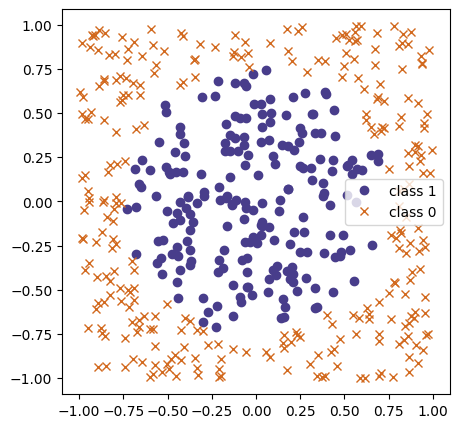

In [3]:
## Acest cod de mai jos generează două valori x și o valoare y conform diferitelor modele.
## De asemenea, creează și un termen "bias" (un vector de 1-uri).
## Scopul este apoi să învețe mapping-ul de la x la y folosind o rețea neurală prin back-propagation.

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# Alegeți un model de mai jos și comentați restul.

# Modelul cercului
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Modelul diamantului
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Patratul centrat
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Modelul unghiului drept gros
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Modelul unghiului drept subțire
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Aici sunt unele functii care ar fi de ajutor

In [4]:
def sigmoid(x):
    """
    Functia sigmoida
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Funcția de pierdere pe care dorim să o optimizăm (să o minimizăm)
    Folosim Pierdere Logaritmică
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Realizează o calculație înainte pentru rețeaua neurală
    Prizează intrarea `x_mat` (variabilă globală) și produce ieșirea `y_pred`
    Produce de asemenea gradientul funcției de pierdere logaritmică
    """
    global x_mat
    global y
    global num_
    # Mai întâi, calculează noile predicții y_pred
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Acum calculează gradientul
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # returneaza
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Compleateaza pseudocodul de mai jos

In [6]:
#### Inițializează parametrii rețelei

np.random.seed(1241)

W_1 = 300
W_2 = 500
num_iter = 10
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    # Realizează o calculație înainte și obține gradientul
    # Actualizează matricele de greutăți
    # Calculează pierderea și acuratețea
    # Afișează pierderea și acuratețea pentru fiecare a 200-a iterație
    
plot_loss_accuracy(loss_vals, accuracies)

IndentationError: expected an indented block after 'for' statement on line 13 (804478941.py, line 19)

In [ ]:
### Trasează răspunsurile prezise, cu greșelile în galben

In [ ]:
## EXERCITIU 1

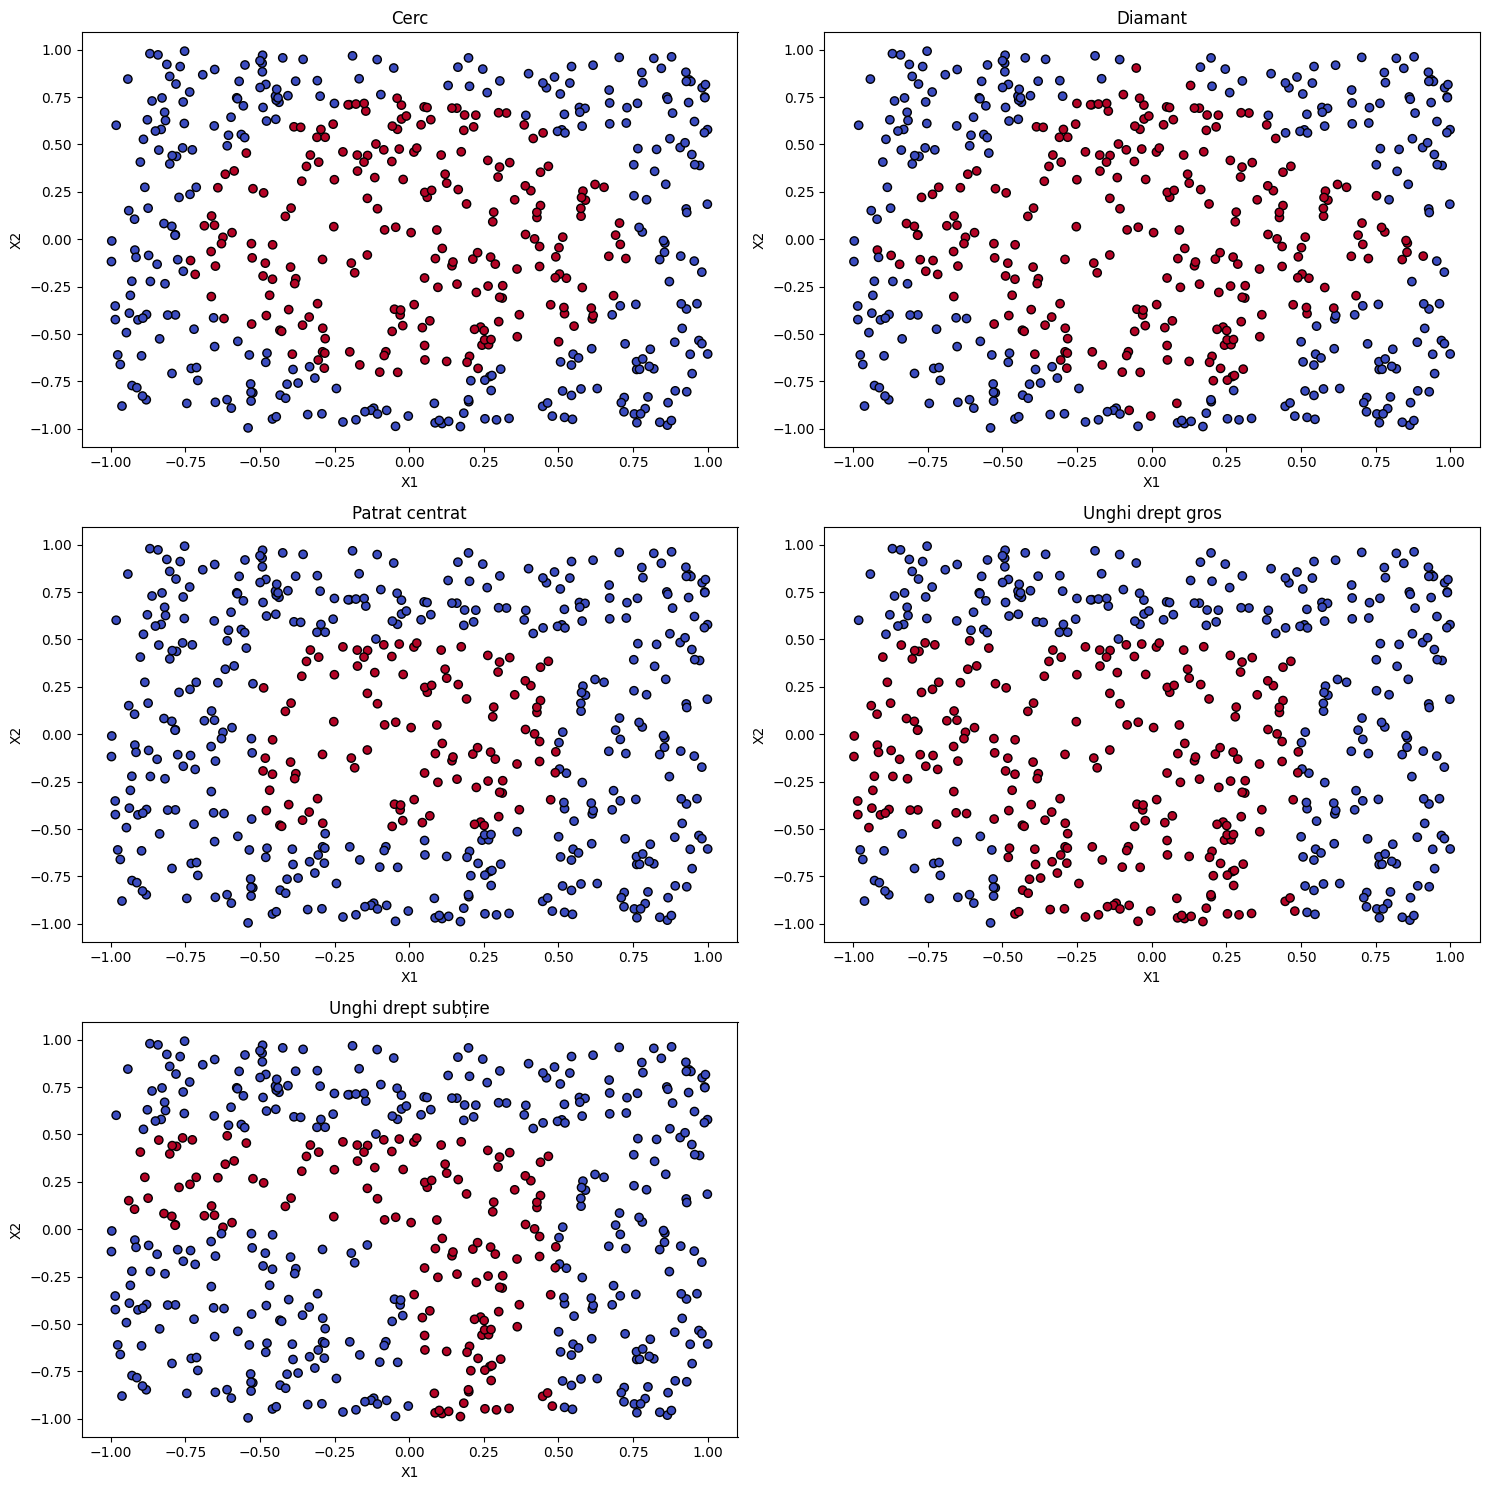

In [7]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Definirea clasei Perceptron
class Perceptron:
    def __init__(self, input_dim, hidden_dim):
        # Inițializare greutăți pentru stratul ascuns și pentru stratul de ieșire
        self.weights_input_hidden = np.random.uniform(-1, 1, size=(input_dim, hidden_dim))
        self.weights_hidden_output = np.random.uniform(-1, 1, size=(hidden_dim, 1))

    def feedforward(self, X):
        # Calcul feed-forward
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

    def backpropagation(self, X, y, learning_rate):
        # Calcul gradient pentru greutățile de la stratul ascuns la ieșire
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Actualizare greutăți
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

    def train(self, X, y, learning_rate, epochs):
        losses = []
        accuracies = []

        for _ in range(epochs):
            # Feed-forward
            output = self.feedforward(X)

            # Calcul pierdere
            loss = np.mean(np.square(y - output))
            losses.append(loss)

            # Calcul acuratețe
            accuracy = 1 - np.mean(np.abs(y - np.round(output)))
            accuracies.append(accuracy)

            # Retropropagare
            self.backpropagation(X, y, learning_rate)

        return losses, accuracies

# Generare de date
num_obs = 500
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

# Modelul cercului
y_circle = (np.sqrt(x_mat_full[:, 0]**2 + x_mat_full[:, 1]**2) < 0.75).astype(int)

# Modelul diamantului
y_diamond = ((np.abs(x_mat_full[:, 0]) + np.abs(x_mat_full[:, 1])) < 1).astype(int)

# Patratul centrat
y_square = ((np.maximum(np.abs(x_mat_full[:, 0]), np.abs(x_mat_full[:, 1]))) < 0.5).astype(int)

# Modelul unghiului drept gros
y_fat_right_angle = (((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) < 0.5) & ((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) > -0.5)).astype(int)

# Modelul unghiului drept subțire
y_thin_right_angle = (((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) < 0.5) & ((np.maximum((x_mat_full[:, 0]), (x_mat_full[:, 1]))) > 0)).astype(int)

# Plot pentru fiecare model
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.scatter(x_mat_full[:, 0], x_mat_full[:, 1], c=y_circle, cmap='coolwarm', edgecolors='k')
plt.title('Cerc')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(3, 2, 2)
plt.scatter(x_mat_full[:, 0], x_mat_full[:, 1], c=y_diamond, cmap='coolwarm', edgecolors='k')
plt.title('Diamant')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(3, 2, 3)
plt.scatter(x_mat_full[:, 0], x_mat_full[:, 1], c=y_square, cmap='coolwarm', edgecolors='k')
plt.title('Patrat centrat')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(3, 2, 4)
plt.scatter(x_mat_full[:, 0], x_mat_full[:, 1], c=y_fat_right_angle, cmap='coolwarm', edgecolors='k')
plt.title('Unghi drept gros')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(3, 2, 5)
plt.scatter(x_mat_full[:, 0], x_mat_full[:, 1], c=y_thin_right_angle, cmap='coolwarm', edgecolors='k')
plt.title('Unghi drept subțire')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()


In [ ]:
##EXERCITIUL 2

Iteration 200: Loss = 0.22331401916724644, Accuracy = 0.5840000000000001
Iteration 400: Loss = 0.10599000374246621, Accuracy = 0.92
Iteration 600: Loss = 0.07058668775432289, Accuracy = 0.946
Iteration 800: Loss = 0.05724508866247709, Accuracy = 0.956
Iteration 1000: Loss = 0.04842490324153505, Accuracy = 0.974


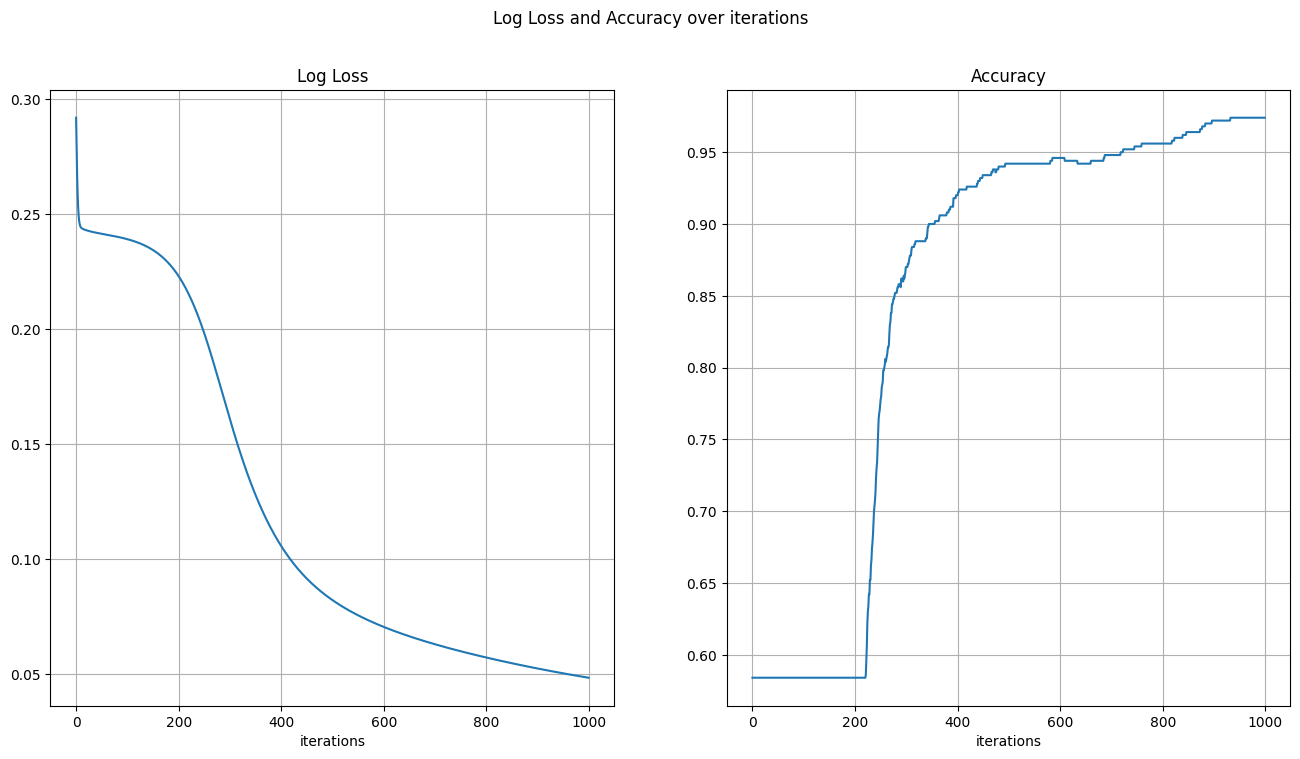

In [8]:
# Inițializarea parametrilor rețelei
np.random.seed(1241)

# Inițializarea ponderilor W_1 și W_2 cu valori aleatoare
input_dim = x_mat_full.shape[1]
hidden_dim = 4
output_dim = 1

W_1 = np.random.randn(input_dim, hidden_dim)
W_2 = np.random.randn(hidden_dim, output_dim)

# Numărul de iterații și rata de învățare
num_iter = 1000
learning_rate = 0.01

# Inițializarea listelor pentru pierdere și acuratețe
loss_vals = []
accuracies = []

# Bucla de antrenare
for i in range(num_iter):
    # Feed-forward
    hidden_layer_input = np.dot(x_mat_full, W_1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W_2)
    output = sigmoid(output_layer_input)
    
    # Calculul gradientului pentru stratul de ieșire
    output_error = y_circle.reshape(-1, 1) - output
    output_delta = output_error * sigmoid_derivative(output)
    
    # Calculul gradientului pentru stratul ascuns
    hidden_error = output_delta.dot(W_2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
    # Actualizarea ponderilor
    W_2 += hidden_layer_output.T.dot(output_delta) * learning_rate
    W_1 += x_mat_full.T.dot(hidden_delta) * learning_rate
    
    # Calculul pierderii și acurateței
    loss = np.mean(np.square(y_circle.reshape(-1, 1) - output))
    accuracy = 1 - np.mean(np.abs(y_circle.reshape(-1, 1) - np.round(output)))
    
    # Adăugarea pierderii și acurateței la listele corespunzătoare
    loss_vals.append(loss)
    accuracies.append(accuracy)
    
    # Afișarea pierderii și acurateței pentru fiecare a 200-a iterație
    if (i + 1) % 200 == 0:
        print(f"Iteration {i+1}: Loss = {loss}, Accuracy = {accuracy}")

# Afișarea evoluției pierderii și acurateței
plot_loss_accuracy(loss_vals, accuracies)